TANG Kévin p1501263

VINCENT Yann p1906701

# TP MIF27 Eval des Perfs
Simulations avec Network Simulator (NS2)

## 1 Premiers pas

**1. A quel moment est appelée la procédure finish ? que fait-elle ?**

La procédure finish est appelée après 5 secondes à partir du début de la simulation.

La procédure "finish" finalise la simulation en vidant les tampons de sortie des traces, en fermant le fichier de trace NAM, en lançant NAM pour visualiser le fichier de trace et en terminant le script de simulation

**2. Quelle est la différence entre TCP et UDP ?**

TCP offre une transmission fiable des données avec un contrôle de flux et une gestion des connexions, tandis qu'UDP offre une transmission plus rapide et plus légère.


**3. Sur quelle couche de transport circule un flux FTP ?**

Un flux FTP (File Transfer Protocol) circule sur la couche de transport du modèle OSI donc sur la couche 4. On aurait aussi pu repondre qu'elle circule sur la couche de transport TCP.

**4. Pourquoi avant de communiquer, les agents doivent être attachés ?**

Les agents doivent être attachés pour définir la nature de leur roles et connexion dans la simulation. C'est essentiel pour modéliser le reseau et assurer le bon deroulement des communication et du routage des données.

**5. Quelles est la taille par d´efaut d’un paquet CBR ?**

Sur NS, la taille par défaut d'un paquet CBR est de 1000 octets.

## 2 Topologie du réseau et routage dynamique

**1. A quoi correspondent les petits paquets qu’on peut voir sur nam. A quels moments sont-ils échangés ? Pourquoi ?**

Les petits paquets qu'on peut voir sur NAM (Network Animator) correspondent aux paquets de contrôle échangés entre les nœuds du réseau, ce sont des paquets de protocole de routage, de requêtes/réponses ARP, de contrôle de flux ou ICMP. Il servent a partager au mieux les informations sur le reseau (sa topologie par exemple) et de constuire les tables des routages des noeuds.

**2. Etude d’une propriété de k-connexité : Définir une Topologie en Grille de 9 noeuds (de n1 à n9).**

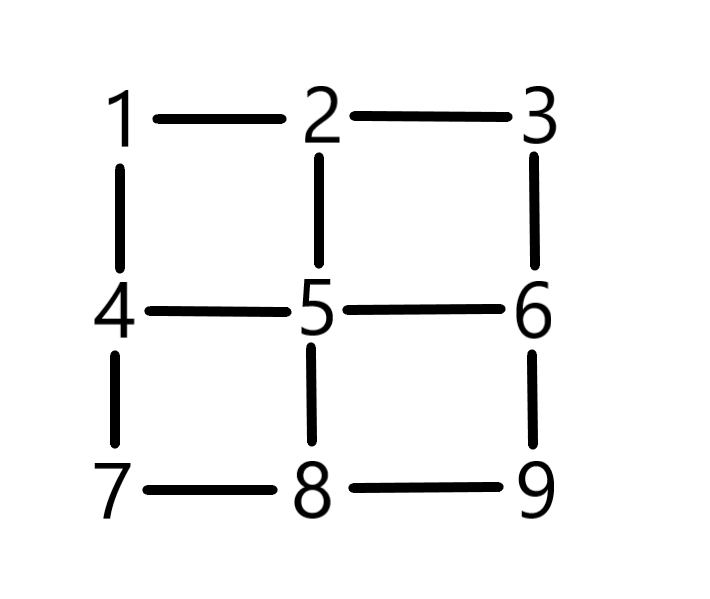

  **(a) Décrire un algorithme qui calcule le nombre de routes possibles entre une source et une destination.**

  On pourrait implémenter une fonction qui explore récursivement tous les chemins possibles entre la source et la destination, en utilisant un compteur pour enregistrer le nombre de routes trouvées. On peux s'inspirer de l'algorithme de recherche en profondeur par exemple. On incremente de 1 le compteur a chaque fois qu'on atteint notre destination puis on reteste un autre chemin en suivant l'algo.


  **(b) Combien y a-il de routes différentes entre n1 et n9 ? Quel est le chemin le plus court ?**


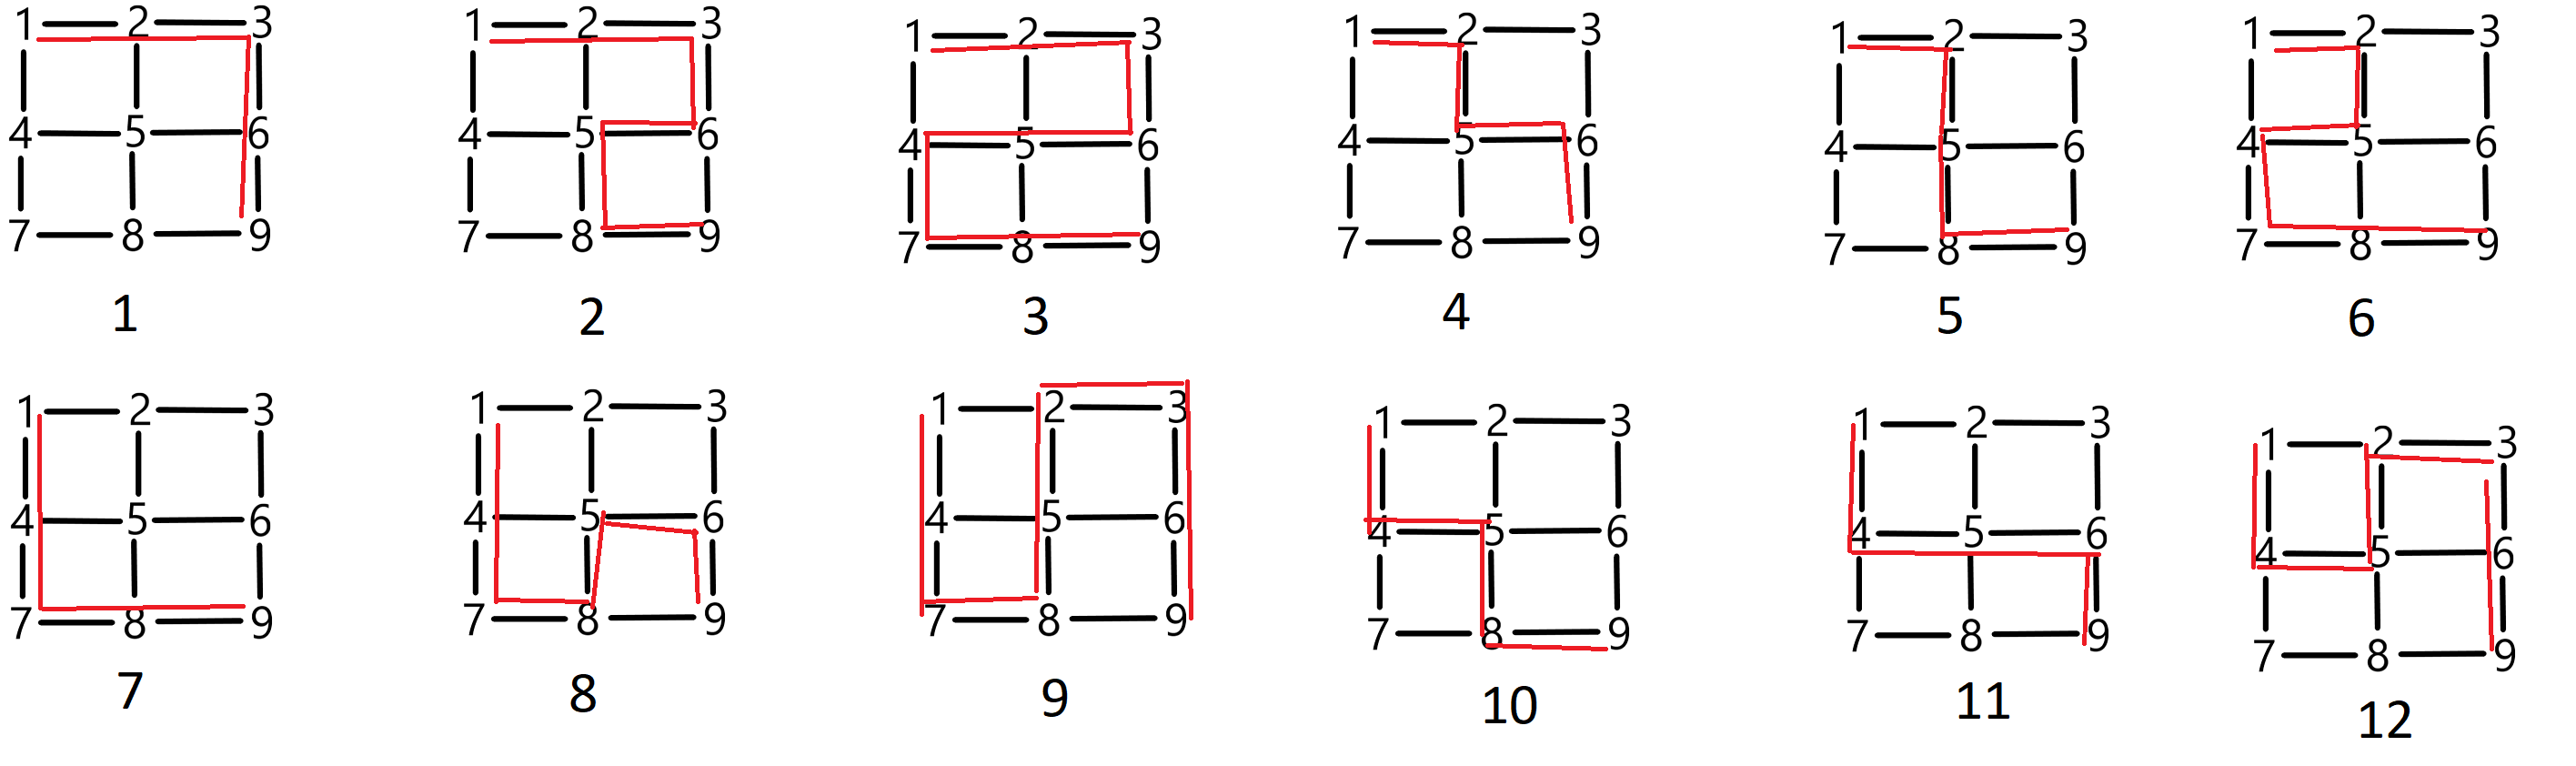

Grace a l'algorithme detaillé juste avant on trouves 12 chemins possibles (tous representés ci dessus)

Le nombre de routes différentes pour le chemin le plus court est de 6 (sans repasser sur un noeud). Les chemins les plus court sont de taille 4 (4 liens entre les noeuds).

Les chemins concernés sont les numeros 1, 4, 5, 7, 10 et 11 sur le schema ci dessus.

  **(c) Lancez un flux constant entre n3 et n8.**

Fait

  **(d) Donnez Le pire scenario -en terme de pannes de liens- que peut rencontrer l’algorithme DV pour la route n3 - n8**

Dv est un algorithme de routage. Il existe plusieurs types de mauvais scénario classons les.

Meilleur scenario : pas de panne ou pannes qui n’affecte pas l’algo pour trouver le chemin le plus court.

Scénario moyen : Quelques liens en panne qui ne coupent pas les communications entre les 2 nœuds mais qui ne permet pas d’avoir le chemin le plus court.

Mauvais scénario : Pannes qui coupent les chemins entre 2 nœuds. Les paquets seront envoyés mais n’atteindront jamais la destination car pas de route dans la table de routage.

Pire scénario : Les pannes coupent le lien entre les 2 nœuds et créent une boucle de routage qui sature les liens entre les nœuds.
Pour avoir le mauvais cas (car le cas de la boucle est dur à se représenter) il faudrait par exemple que tous les liens autour de n3 soient rompus, de même pour n8. Autre cas, si tous les liens vers un nœud intermédiaire où le passage est obligatoire (obligé de passé par celui-ci pour faire les liens entre les 2 noeuds) soient en panne.

Le pire cas du scénario moyen revient à trouver le chemin le plus long possible entre ces deux noeuds. Dans notre grille de 9 noeuds c'est le chemin traversant ces noeuds : n3-n2-n1-n4-n5-n6-n9-n8.
 Pour réaliser cela, il faudrait donc couper les liens entre n3-n6, n2-n5 n4-n7 et n5-n8 (accessoirement n7-n8).



**3. Refaire seulement la question précédente pour une grille torique**

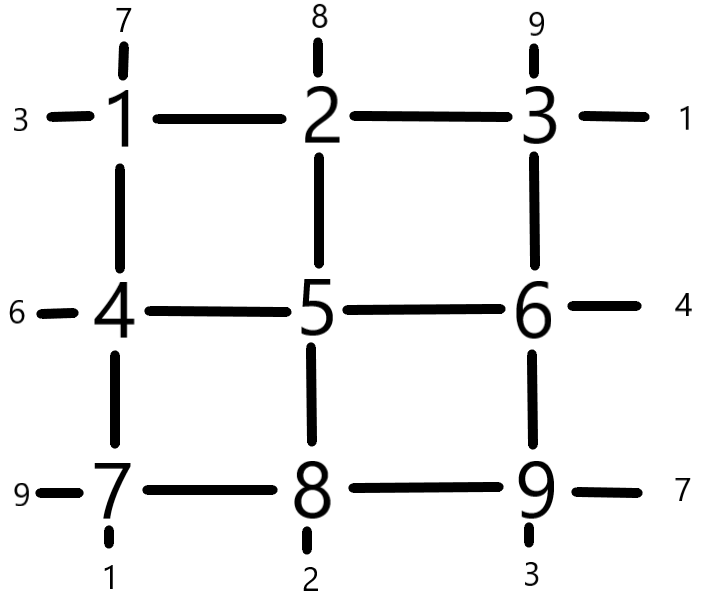

Dans une grille torique, les bords de notre grille précédente sont reliés entre eux, il y a donc davantage de chemins possibles entre les noeuds.

Même cas que précédemment sauf pour le pire cas des moyens cas ou le chemin le plus long qu'on puisse réaliser est le suivant : n3-n9-n6-n5-n2-n1-n4-n7-n8. On passerait alors par l'ensemble des noeuds.
Il faudrait donc couper les liens n3-n1, n2-n3, n3-n6, n8-n9, n9-n7, n6-n4, n5-n8, n5-n4, n2-n8 et n1-n7.


## 3 Echanges de messages

**Donnez une description détaillée de tout ce qui se passe dans cette cette simulation.**

Création du simulateur : Un objet de simulateur est créé à l'aide de la commande "new Simulator".

Configuration des fichiers de trace : Deux fichiers de trace sont ouverts, l'un pour les informations de trace générales (out.tr) et l'autre pour la visualisation dans l'outil NAM (out.nam).

Création de la topologie : La topologie est définie avec trois nœuds, n0, n1 et n2, disposés en ligne. Les nœuds sont connectés par des liens duplex avec des caractéristiques de bande passante et de délai spécifiées.

Création des agents UDP : Deux agents UDP sont créés, udp0 et udp1, et attachés respectivement aux nœuds n0 et n1. Ces agents sont utilisés pour l'envoi et la réception de datagrammes UDP.

Connexion des agents UDP : Les agents udp0 et udp1 sont connectés l'un à l'autre à l'aide de la commande "$ns connect $udp0 $udp1". Cela permet la transmission de données entre les agents.

Définition de la méthode "process_data" : Une méthode personnalisée "process_data" est définie pour les agents UDP. Cette méthode est appelée lorsqu'un agent reçoit des données. Dans cette simulation, la méthode vérifie si les données reçues correspondent au format "ping(###)" ou "countdown(###)" et répond en conséquence.

Configuration des classes des agents UDP : Les agents udp0 et udp1 sont configurés avec des classes distinctes à des fins de visualisation dans NAM.

Programmation des envois de données : Plusieurs envois de données sont programmés à des moments spécifiques avec des réponses.
A t = 0.1 l'agent udp0 envoi un ping(42) de taile 724 octets a udp1.
udp1 renvoie un pong(42) de 100 octets.
A t = 0.2 udp1 envoi un countdown(5) de 100 octets a udp0.
udp1 renvoie countdown(4) a udp0 qui renverra ensuite countdown(3) et ainsi de suite jusqu'a 0 (msg de 100 octets).
A t = 0.3 udp0 envoi un 'ignore this message" de taille 500 octets(il sera ignoré).
A t = 0.4 udp1 envoi un ping(122345678) de 828 octets a udp0.
udp1 renvoi un pong(12345678) de 100 octets.

Définition de la procédure "finish" : Une procédure "finish" est définie pour terminer correctement la simulation. Elle vide les informations de trace, ferme les fichiers de trace et exécute l'outil NAM pour visualiser les résultats.

Exécution de la simulation : La commande "$ns run" est utilisée pour exécuter la simulation.

## 4 Réseaux sans fil


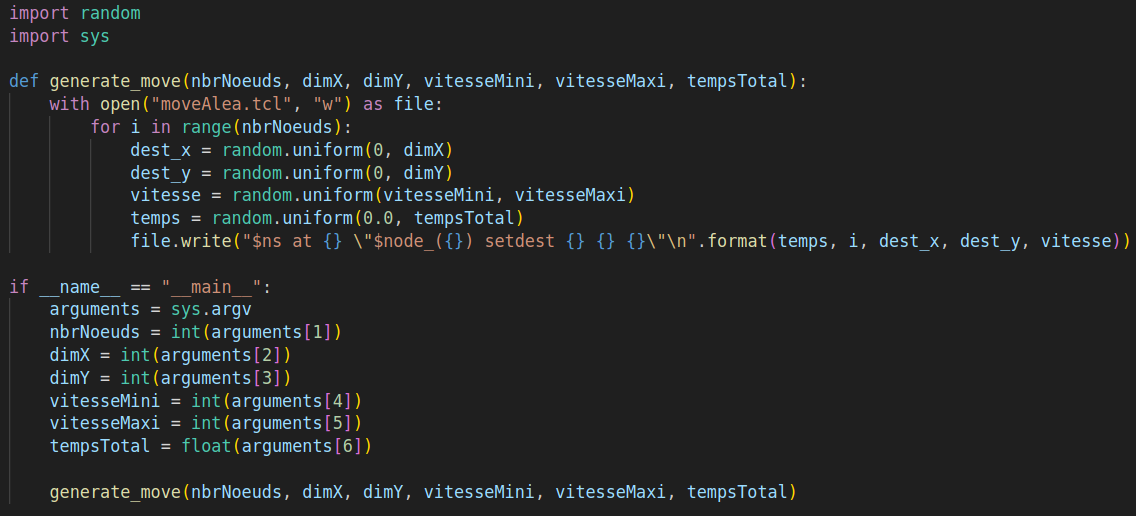

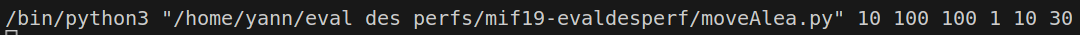

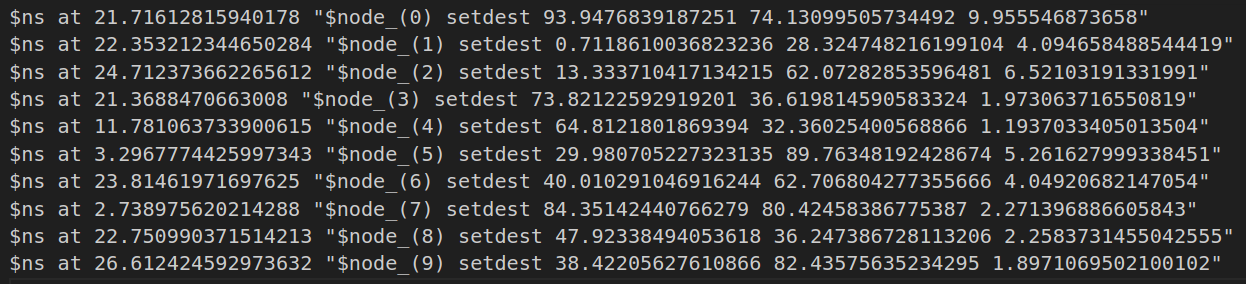

Pour 10 noeuds avec 100 et 100 pour les 2 dimensions, 1 vitesse mini et 10 vitesse max (intervalle) et un temps total de 30 secondes.

## 5 Analyse du fichier trace

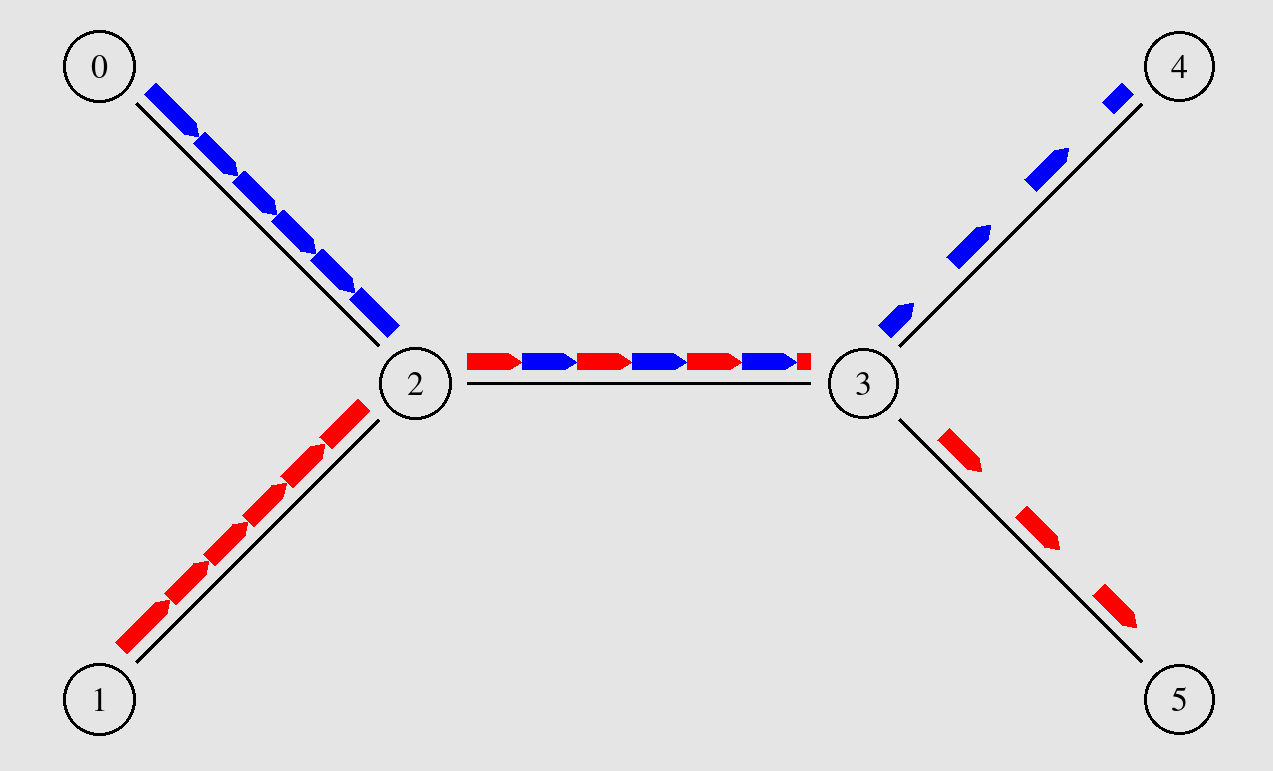

Nos valeurs de base sont :

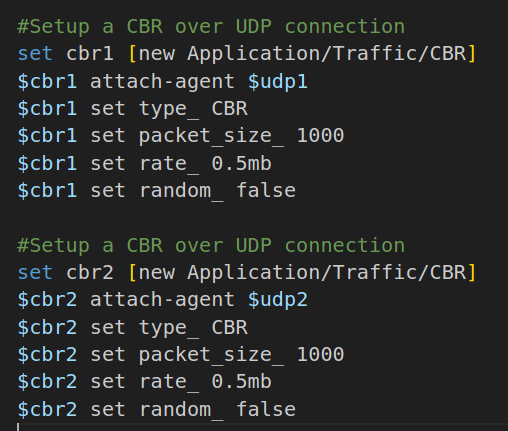

Soit 0.5 mb/s de debit ainsi que des paqutes de 1000 octets. Aucun perte.

**Augmenter les debits d'emission de maniere a avoir des pertes de paquets.**

Pour avoir un impact sur la congestion, nous avons fait varier le débit d'envoi des messages de nos flux (ici à 0.5Mb/s), à 2Mb/s pour forcer la congestion.

Nous avons ensuite analysé le fichier out.nam avec un simple script Python pour parcourir les lignes du fichier et répondre aux questions suivantes.

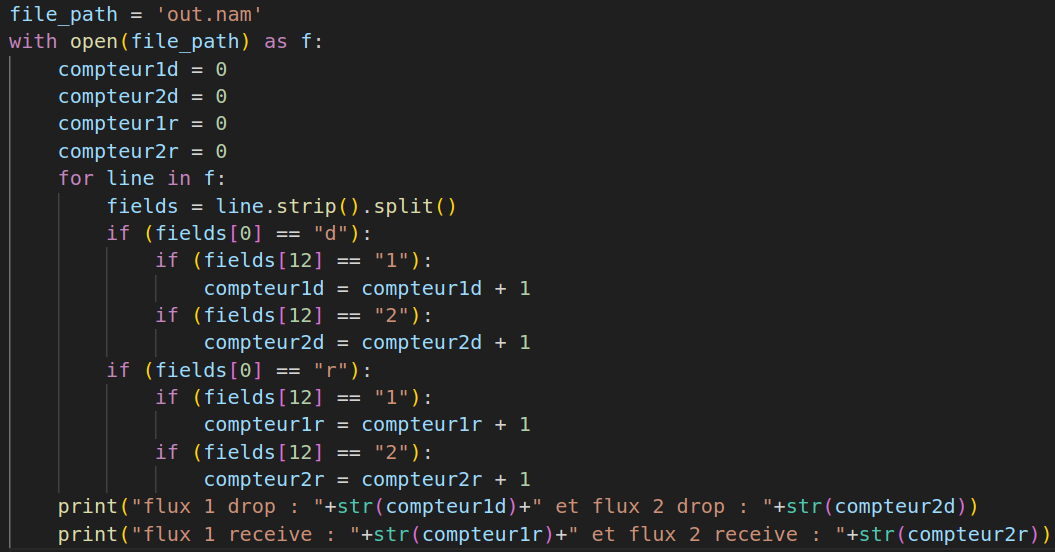

**Quel flux a perdu le plus de paquets (on peut distinguer les flux par leurs émetteurs ou destinataires) ?**

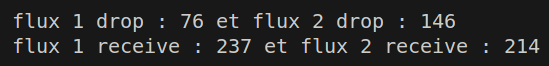

Le flux entre 0 et 4 a perdu 76 paquets.

Le flux entre 1 et 5 a perdu 146 paquets.

Le flux ayant perdu le plus de paquets est donc le flux entre les noeuds 1 et 5.

**Comparer maintenant les nombres de paquets reçus.**

Nombre de paquets reçus dans le flux n0-n4 : 237

Nombre de paquets reçus dans le flux n1-n5 : 214

Le flux ayant reçu le plus de paquets est donc le flux entre les noeuds 0 et 4. Et celui en ayant perdu le plus est le flux n1-n5


**Remplacer le second flux CBR par un flux FTP. Que remarquez-vous ? expliquez pourquoi**



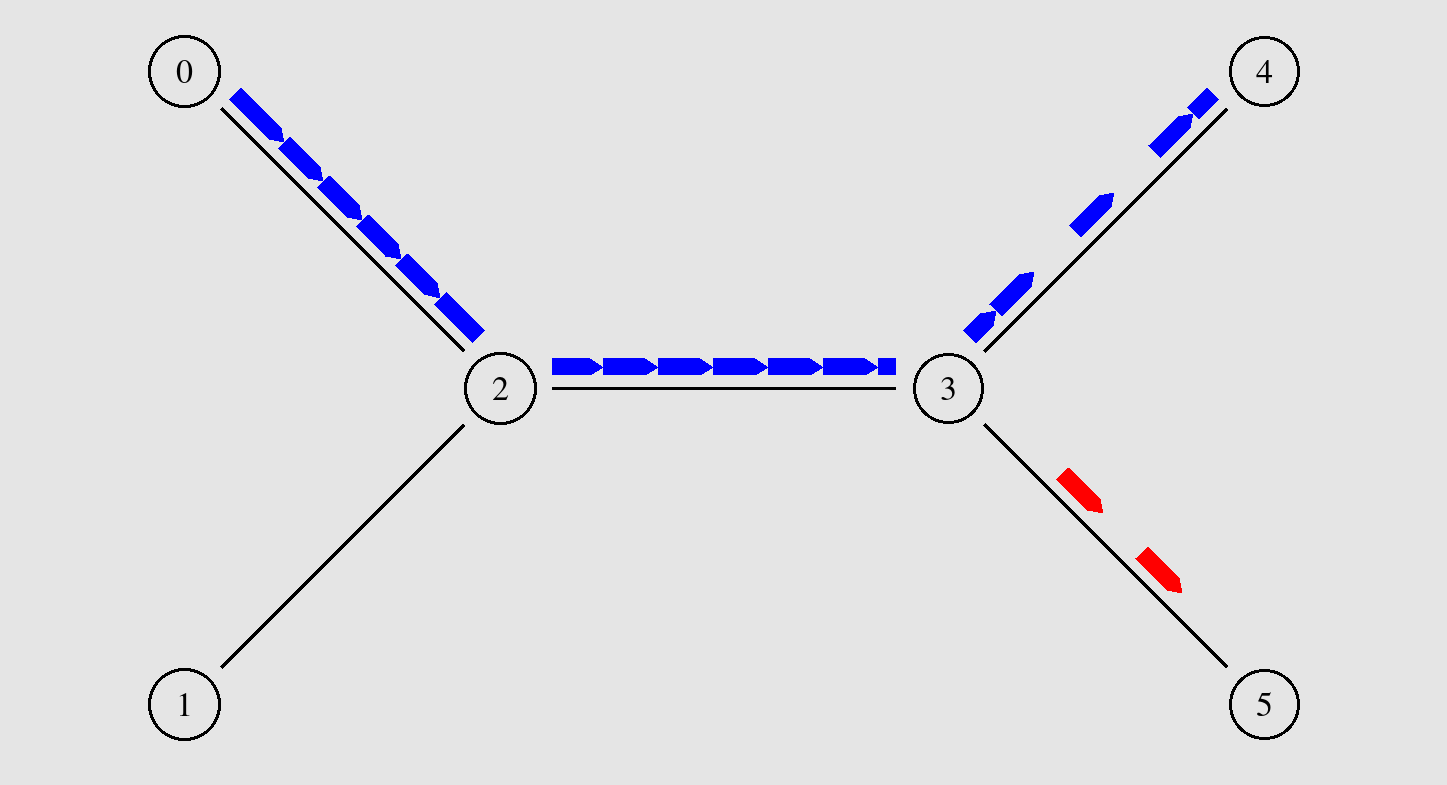

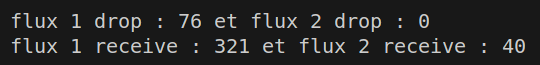

On remarque que le flux n1-n5 n'a perdu aucun paquet. Cela s'explique par le fait que FTP utilise le protocole TCP qui garantit l'intégrité de la livraison des paquets. Alors que CBR utilise le protocole UDP offre une vitesse plus élevée mais ne garantit pas la transmission des paquets. On remarque aussi logiquement que le flux n0-n4 a recu plus de paquet que le flux n1-n5 car il est plus rapide.

## 6 Files d’attente

**1. Donner une analyse pour la fonction sendpacket.**

La fonction sendpacket génère des paquets avec des intervalles de temps aléatoires, puis les envoie à travers le réseau à partir de l'agent source vers l'agent de destination.

**2. Calculer le débit moyen.**

Pour calculer le debit moyen on compte le nombre de paquet envoyé par secondes. On envoie 726 paquets en 50 secondes. Donc le débit est de 14.52 paquets/s.

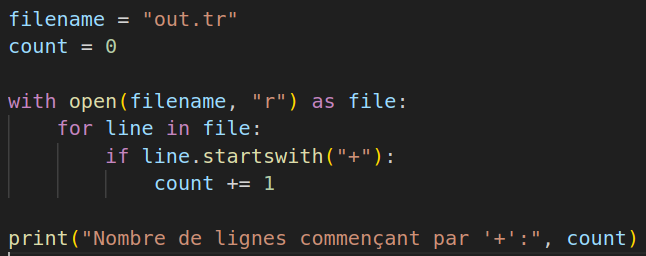

**3. Calculer le temps de réponse.**

Le temps de reponses moyen est R :


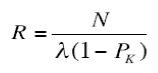

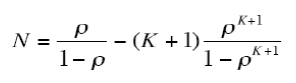

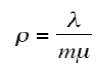

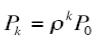

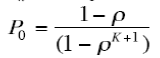

K = 8
lambda = 15
µ = 22

P = lambda / µ car m = 1

N = 1.84

Pk = 0.015

P0 = 0.328

Donc R = 0.124
Donc le taux de réponse moyen est de 124 ms.


**4. Calculer la longueur moyenne de la file**

On recupère la moyenne de la 5ieme colonnes de out.tr soit qsizeP.
Grace à un simple algo python on trouve : 1.163 pour la longueur moyenne de la file.

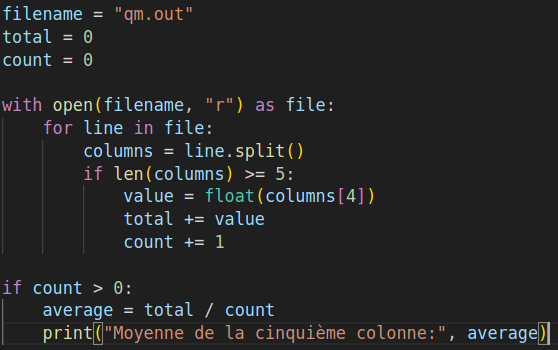

**5. Calculer le taux d’occupation.**


image.png

P0 = 0.328

U le taux d'occupation, donc U = 0.671 soit 67%

**6. Calculer l’intensité du traffic.**

L'intensité du trafic est P (rho) donc 15/22 soit 0.68


**7. Calculer le taux de rejet.**

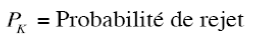

On recupere Pk calculé avant soit : 0.0153 ce qui fait 1.53 % de messages rejeté

**Recapitulatif** :

Débit moyen : 14.52 paquets/s

Temps de réponse moyen : 124 ms

Longueur moyenne de la file : 1.163

Taux d'occupation : 0.671

Intensité du trafic : 15/22 = 0.681

Taux de rejet : 1.53 % de messages rejetés

**8. Refaire les questions précédentes pour une file M/M/1/∞.**

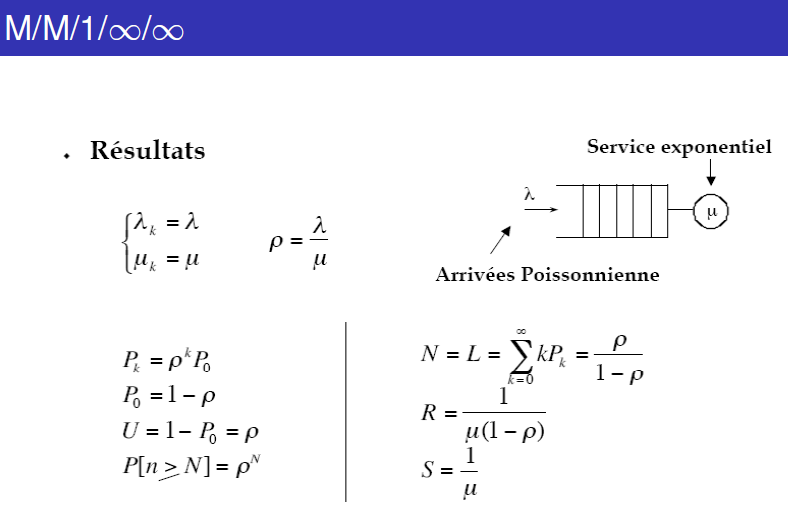

Débit moyen : 14.52 paquets/s (même debit qu'avant)

Temps de réponse moyen : 1/7 = 0.142 s = 142 ms

Longueur moyenne de la file : 1.163 (même qu'avant)

Taux d'occupation : U = 15/22 = 0.681 soit 68%

Intensité du trafic : 0.681

Taux de rejet : 44 % de rejet (P^N) car probabilité de rejet de 0.44

## 7 Evaluation de la mobilite et Mouvement aleatoire

**Expliquez les formules en termes de mouvements relatifs.**

Ax(t) représente la moyenne des distances relatives entre un noeud x et tous les autres noeuds un instant.  On mesure la distance moyenne entre x et les autres noeuds en prenant leurs positions relatives à un instant précis. Cette formule évalue donc la dispersion spatiale du noeud x par rapport à ses voisins en fonction de leur mouvement relatif.

M(x) calcule la mobilité moyenne du noeud x pendant une durée de temps T. On mesure les changements de distance relative entre le noeud x et ses voisins. On évalue la mobilité moyenne du nœud x en tenant compte de ses mouvements relatifs avec ses voisins.

Mob représente la mobilité moyenne dans l'ensemble du réseau. On prend la moyenne des mobilités individuelles relatives de tous les noeuds du réseau. Elle mesure la mobilité globale en prenant ne compte pas les mouvements relatifs de tous les noeuds et en évaluant leurs variations de distances relatives au cours des temps.

## Annexes

Tcl de la partie 5.

In [ ]:
#Create a simulator object
set ns [new Simulator]

#Define different colors for data flows (for NAM)
$ns color 1 Blue
$ns color 2 Red

#Open the NAM trace file
set nf [open out.nam w]
$ns namtrace-all $nf

#Define a ’finish’ procedure
proc finish {} {
    global ns nf
    $ns flush-trace

    #Close the NAM trace file
    close $nf

    #Execute NAM on the trace file
    exec nam out.nam &
    exit 0
}

#Create six nodes
set n0 [$ns node]
set n1 [$ns node]
set n2 [$ns node]
set n3 [$ns node]
set n4 [$ns node]
set n5 [$ns node]

# n0 -> n2
# n1 -> n2
# n2 -> n3
# n3 -> n4
# n3 -> n5


#Create links between the nodes
$ns duplex-link $n0 $n2 1Mb 50ms DropTail
$ns duplex-link $n1 $n2 1Mb 50ms DropTail
$ns duplex-link $n2 $n3 1Mb 50ms DropTail
$ns duplex-link $n3 $n4 1Mb 50ms DropTail
$ns duplex-link $n3 $n5 1Mb 50ms DropTail

#Give node position (for NAM)
$ns duplex-link-op $n0 $n2 orient right-down
$ns duplex-link-op $n1 $n2 orient right-up
$ns duplex-link-op $n2 $n3 orient right
$ns duplex-link-op $n3 $n4 orient right-up
$ns duplex-link-op $n3 $n5 orient right-down

#Setup a UDP connection
set udp1 [new Agent/UDP]
$ns attach-agent $n0 $udp1
set null1 [new Agent/Null]
$ns attach-agent $n4 $null1
$ns connect $udp1 $null1
$udp1 set fid_ 1

#Setup a UDP connection
#set udp2 [new Agent/UDP]
#$ns attach-agent $n1 $udp2
#set null2 [new Agent/Null]
#$ns attach-agent $n5 $null2
#$ns connect $udp2 $null2
#$udp2 set fid_ 2

#Setup a TCP connection

set tcp [new Agent/TCP]
$tcp set class_ 2
$ns attach-agent $n1 $tcp
set sink [new Agent/TCPSink]
$ns attach-agent $n5 $sink
$ns connect $tcp $sink
$tcp set fid_ 2


#Setup a CBR over UDP connection
set cbr1 [new Application/Traffic/CBR]
$cbr1 attach-agent $udp1
$cbr1 set type_ CBR
$cbr1 set packet_size_ 1000
$cbr1 set rate_ 2mb
$cbr1 set random_ false

#Setup a CBR over UDP connection
#set cbr2 [new Application/Traffic/CBR]
#$cbr2 attach-agent $udp2
#$cbr2 set type_ CBR
#$cbr2 set packet_size_ 1000
#$cbr2 set rate_ 2mb
#$cbr2 set random_ false

#Setup a FTP over TCP connection

set ftp [new Application/FTP]
$ftp attach-agent $tcp
$ftp set type_ TCP

#Schedule events for the CBR and FTP agents
$ns at 0.0 "$cbr1 start"
#$ns at 0.0 "$cbr2 start"
$ns at 1.0 "$cbr1 stop"
#$ns at 1.0 "$cbr2 stop"
$ns at 0.0 "$ftp start"
$ns at 1.0 "$ftp stop"

#Call the finish procedure after 5 seconds of simulation time
$ns at 1.0 "finish"

#Run the simulation
$ns run